In [1]:
import os
import json
import requests

from dotenv import load_dotenv
from typing import List

from IPython.display import Image, display
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import HumanMessage

load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
SECTORS_API_KEY = os.getenv("SECTORS_API_KEY")
# SECTORS_API_KEY = "caa1a3b0c03c98047c2d9f790047058c8a9dd0d944df103ffc540ce11d1b41df"


def retrieve_from_endpoint(url: str) -> dict:
    headers = {"Authorization": SECTORS_API_KEY}

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        data = response.json()
    except requests.exceptions.HTTPError as err:
        raise SystemExit(err)
    return json.dumps(data)


@tool
def get_company_overview(stock: str) -> str:
    """
    Get company overview

    @param stock: The stock symbol of the company
    @return: The company overview
    """

    url = f"https://api.sectors.app/v1/company/report/{stock}/?sections=overview"

    return retrieve_from_endpoint(url)


@tool
def get_top_companies_ranked(dimension: str) -> List[str]:
    """
    Return a list of top companies (symbol) based on certain dimension (dividend yield, total dividend, revenue, earnings, market cap, PB ratio, PE ratio, or PS ratio)

    @param dimension: The dimension to rank the companies by, one of: dividend_yield, total_dividend, revenue, earnings, market_cap, pb, pe, ps
    @return: A list of top tickers in a given year based on certain classification
    """

    url = f"https://api.sectors.app/v1/companies/top/?classifications={dimension}"

    return retrieve_from_endpoint(url)


prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            f"""Answer the following queries, being as factual and analytical 
            as you can. If you need the start and end dates but they are not 
            explicitly provided, infer from the query. Whenever you return a 
            list of names, return also the corresponding values for each name. 
            If the volume was about a single day, the start and end 
            parameter should be the same. Always answer in markdown table if you can.
            """,
        ),
        ("human", "{text}"),
    ]
)

llm = ChatGroq(
    temperature=0,
    model_name="llama3-groq-70b-8192-tool-use-preview",
    groq_api_key=GROQ_API_KEY,
)
tools = [
    get_company_overview,
    get_top_companies_ranked,
]

system_message = "You are an expert tool calling agent meant for financial data retriever and summarization. Use tools to get the information you need. If you do not know the answer to a question, say so. Whenever possible, answer with markdown-formatted code."
app = create_react_agent(llm, tools, state_modifier=system_message)


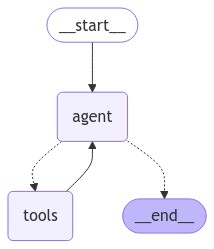

In [2]:
display(Image(app.get_graph().draw_mermaid_png()))

In [4]:
app.get_graph().draw_mermaid()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00$rXYZ\x00\x00\x01\x14\x00\x00\x00\x14gXYZ\x00\x00\x01(\x00\x00\x00\x14bXYZ\x00\x00\x01<\x00\x00\x00\x14wtpt\x00\x00\x01P\x00\x00\x00\x14rTRC\x00\x00\x01d\x00\x00\x00(gTRC\x00\x00\x01d\x00\x00\x00(bTRC\x00\x00\x01d\x00\x00\x00(cprt\x00\x00\x01\x8c\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x00\x00\x08\x00\x00\x00\x1c\x00s\x00R\x00G\x00BXYZ \x00\x00\x00\x00